# Load and prepare data for this specific dataset (German Credit Dataset)

In [1]:
import sys
%load_ext autoreload
%autoreload 2

sys.path.append("../libs/")
from data_prep import *



In [2]:
X,y=load_data()


##Tests 
def test1(value):
    if value>=35:
        return 1
    else:
        return 0
def test2(value):
    if value <30 or value>60:
        return 1
    else:
        return 0
###

##Replace with binary for age and make ycolumn: 0 or 1
X=replace_values_with_binary(X,"Attribute9",["A91","A93","A94"])# transform Attribute9 it into gender column

y=replace_values_with_binary(y,y.columns[0],[1])# transform y to col with 0/1 values with 0:bad  1:good 
print(y)

X=apply_function_to_column(df=X,column_name="Attribute13",test_function=test1, new_name="Age_group")


X,y=add_bias (X=X, unprivileged_class_name="Age_group", unprivileged_class_value=0, y=y, p=0.3, verbose=True) #Age bias
X,y=add_bias(X=X, unprivileged_class_name="Attribute9", unprivileged_class_value=0, y=y, p=0.3, verbose=True) #Gender bias


num_features=["Attribute2", "Attribute5", "Attribute8", "Attribute11", "Attribute13", "Attribute16", "Attribute18"]
cat_features=[col_name for col_name in X.columns if col_name not in num_features]
X = pd.get_dummies(X, columns = cat_features, drop_first=True)



X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state=123)

X_val,X_test,y_val,y_test=train_test_split(X_test,y_test, test_size=0.5, random_state=123) ##this make 0.2 for both val and test



## Save sensitive attributes

gender_train=X_train["Attribute9_1"]
age_train=X_train["Age_group_1"]

gender_test=X_test["Attribute9_1"]
age_test=X_test["Age_group_1"]

gender_val=X_val["Attribute9_1"]
age_val=X_val["Age_group_1"]








#Drop columns for without attribute and redundant ones

X_train_with_A=X_train.copy() #X with sensitive_attributes
X_train_with_A.drop("Age_group_1" , axis=1, inplace=True)
X_train_without_A=X_train.drop(["Age_group_1","Attribute9_1" ], axis=1)

X_test_with_A=X_test.copy() #X with sensitive_attributes
X_test_with_A.drop("Age_group_1" , axis=1, inplace=True)
X_test_without_A=X_test.drop(["Age_group_1","Attribute9_1" ], axis=1)

X_val_with_A=X_val.copy() #X with sensitive_attributes
X_val_with_A.drop("Age_group_1" , axis=1, inplace=True)
X_val_without_A=X_val.drop(["Age_group_1","Attribute9_1" ], axis=1)




Data loaded successfully
     class
0        1
1        0
2        1
3        1
4        0
..     ...
995      1
996      1
997      1
998      0
999      1

[1000 rows x 1 columns]
unpriv drop     Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6   
12         A12          12        A32        A43        1567        A61  \
14         A11          15        A32        A40        1403        A61   
17         A11          30        A30        A49        8072        A65   
19         A14          24        A32        A43        3430        A63   
24         A14          10        A34        A42        2069        A65   
..         ...         ...        ...        ...         ...        ...   
991        A14          15        A31        A43        1569        A62   
992        A11          18        A32        A43        1936        A65   
993        A11          36        A32        A42        3959        A61   
995        A14          12        A32        A42        

# Save data in dataframes folder for Dataframes folder for future use

In [3]:
store_data(dataset_name='German_credit_biased',X_train_with_A=X_train_with_A, X_train_without_A=X_train_without_A,X_val_with_A=X_val_with_A, 
            X_val_without_A = X_val_without_A, X_test_with_A = X_test_with_A, X_test_without_A= X_test_without_A, y_train =  y_train,
            y_val = y_val, y_test = y_test, age=[age_train, age_val, age_test], gender= [gender_train, gender_val, gender_test], education=None)


Dataframes saved in their directory from 'Dataframes' directory.


# Brief analysis (for this specific dataset)

Index(['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13',
       'Attribute16', 'Attribute18', 'Attribute1_A12', 'Attribute1_A13',
       'Attribute1_A14', 'Attribute3_A31', 'Attribute3_A32', 'Attribute3_A33',
       'Attribute3_A34', 'Attribute4_A41', 'Attribute4_A410', 'Attribute4_A42',
       'Attribute4_A43', 'Attribute4_A44', 'Attribute4_A45', 'Attribute4_A46',
       'Attribute4_A48', 'Attribute4_A49', 'Attribute6_A62', 'Attribute6_A63',
       'Attribute6_A64', 'Attribute6_A65', 'Attribute7_A72', 'Attribute7_A73',
       'Attribute7_A74', 'Attribute7_A75', 'Attribute9_1', 'Attribute10_A102',
       'Attribute10_A103', 'Attribute12_A122', 'Attribute12_A123',
       'Attribute12_A124', 'Attribute14_A142', 'Attribute14_A143',
       'Attribute15_A152', 'Attribute15_A153', 'Attribute17_A172',
       'Attribute17_A173', 'Attribute17_A174', 'Attribute19_A192',
       'Attribute20_A202', 'Age_group_1'],
      dtype='object')
     class
0        1
1        0
2      

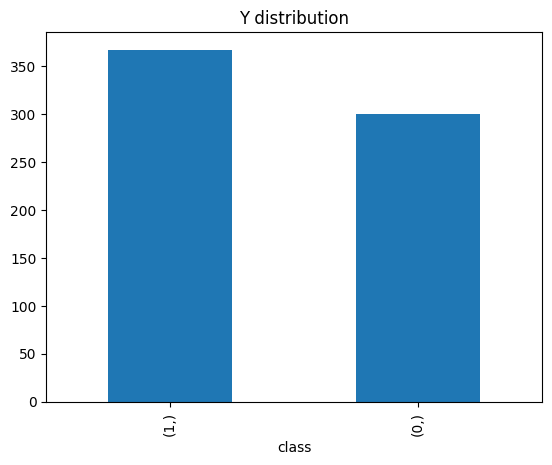

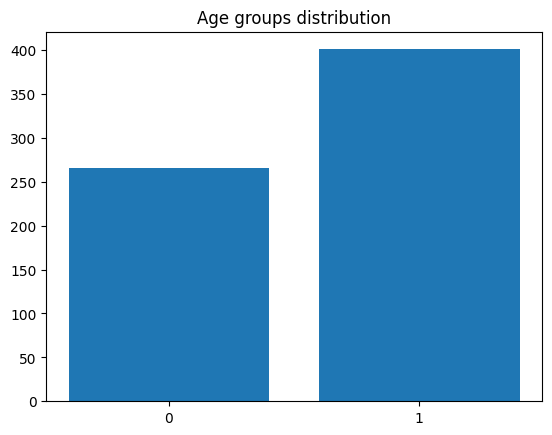

In [4]:
print(X.columns)
y.value_counts().plot.bar()
print(y)
plt.title("Y distribution")
plt.show()





# Create an array to represent the index (0 and 1)
index = np.array([0, 1])

# Create a list of the numbers
values = [X.shape[0]- X["Age_group_1"].sum(),X["Age_group_1"].sum()]

# Create the bar plot
plt.bar(index, values)

# Set the x-tick labels for the index
plt.xticks(index, ['0', '1'])

plt.title("Age groups distribution")
plt.show()


# Prediction 

In [5]:
#########MODEL 


###Preprocessing part###

####SCALE
X_train_with_A, X_val_with_A, X_test_with_A, X_test_without_A, X_val_without_A, X_test_without_A=scale_dataframes(
    [X_train_with_A, X_val_with_A, X_test_with_A, X_test_without_A, X_val_without_A, X_test_without_A])  ###scale all dfs ##Take care scale keeps 0,1 true


############# find best model

param_grid_rf = {
    'n_estimators': [10,50, 100],
    'max_depth': [5,10],
    'min_samples_leaf': [ 8,16]
}


#param_grid_svc = {
    #'C': [0.1, 1, 10],
    #'kernel': ['linear']
#}

param_grid_knn = {
    'n_neighbors': [3,5, 10, 20]
}


param_grid_lr = {
    'C': [ 0.001,0.01,0.1,1],
    'penalty': ['l2',
    ]
}




model_rf=RandomForestClassifier()

model_knn = KNeighborsClassifier()
model_lr = LogisticRegression()  # The solver 'liblinear' is suitable for small datasets.

#best_rf = find_best_model(model_rf, param_grid_rf, X_train_without_A, y_train.values.ravel(), X_val_without_A, y_val.values.ravel())
#best_knn = find_best_model(model_knn, param_grid_knn, X_train_without_A, y_train.values.ravel(), X_val_without_A, y_val.values.ravel())
#best_lr = find_best_model(model_lr, param_grid_lr, X_train_without_A, y_train.values.ravel(), X_val_without_A, y_val.values.ravel())


##SAME IF CONSIDERING SENSITIVE ATTRIBUTE

best_rf_A = find_best_model(model_rf, param_grid_rf, X_train_with_A, y_train.values.ravel(),  X_val_with_A, y_val.values.ravel())
best_knn_A = find_best_model(model_knn, param_grid_knn, X_train_with_A, y_train.values.ravel(), X_val_with_A, y_val.values.ravel() )
best_lr_A = find_best_model(model_lr, param_grid_lr, X_train_with_A, y_train.values.ravel(),  X_val_with_A, y_val.values.ravel())















Best Model Hyperparameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_leaf': 8}
Validation Accuracy: 0.7819548872180451
Best Model Hyperparameters: {'n_neighbors': 20}
Validation Accuracy: 0.7669172932330827
Best Model Hyperparameters: {'C': 1, 'penalty': 'l2'}
Validation Accuracy: 0.7819548872180451


# Save the models for future use 

In [7]:
import joblib
import os


dataset_name="German_credit_biased"
# Define the directory path for saving models
models_directory = os.path.join( '..', 'ML_models', dataset_name)  # '..' moves one directory up

# Create the 'models' directory if it doesn't exist
if not os.path.exists(models_directory):
    os.makedirs(models_directory)
    
# Save the best models to separate files
joblib.dump(best_rf_A, os.path.join(models_directory, 'best_random_forest_A_model.pkl'))
joblib.dump(best_knn_A, os.path.join(models_directory, 'best_knn_A_model.pkl'))
joblib.dump(best_lr_A, os.path.join(models_directory, 'best_logistic_regression_A_model.pkl'))

X_train_val_with_A, y_train_val = merge_two_sets(X_train_with_A, X_val_with_A, y_train, y_val)





best_rf_A.fit(X_train_val_with_A, y_train_val.ravel())
best_lr_A.fit(X_train_val_with_A, y_train_val.ravel())
best_knn_A.fit(X_train_val_with_A, y_train_val.ravel())

# Save the best models to separate files
joblib.dump(best_rf_A, os.path.join(models_directory, 'best_random_forest_big_A_model.pkl'))
joblib.dump(best_knn_A, os.path.join(models_directory, 'best_knn_big_A_model.pkl'))
joblib.dump(best_lr_A, os.path.join(models_directory, 'best_logistic_regression_big_A_model.pkl'))

print("Best models saved in the 'models' directory.")


Best models saved in the 'models' directory.
